In [1]:
import gsw, time, datetime, sys, os, glob, xgcm, matplotlib, xarray as xr, numpy as np, dask.array as da, pandas as pd, cartopy.crs as ccrs
import matplotlib.patches as patches, cmocean
from scipy import signal, fft
import xrft
import cartopy.mpl.ticker as cticker, string
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm, TwoSlopeNorm
import matplotlib.pyplot as plt, matplotlib.colors as colors, matplotlib.dates as mdates

In [2]:
time = pd.date_range("2021-01-01", "2021-02-23, 23:00:00", freq="h")
time[1178]

Timestamp('2021-02-19 02:00:00')

In [3]:
scales = [20, 30, 50, 100]
ntime = 1178
pi_BMs_coas=[]
pi_tot_coas=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_BMs_coas.append(ds["Pi"][ntime,25:-25,25:-25])

    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/coas_tot/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_tot_coas.append(ds["Pi"][ntime,25:-25,25:-25])
    
pi_BMs_coas = np.array(pi_BMs_coas)
pi_tot_coas = np.array(pi_tot_coas)

/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_20km_pi.nc


/home/fcampos/miniconda3/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'argo' loading failed:
cannot import name 'resolve_auth_type' from 'botocore.auth' (/home/fcampos/miniconda3/lib/python3.11/site-packages/botocore/auth.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


/media/fcampos/DATA_SAVE/data_fernando/pi/coas_tot/filter_20km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_30km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_tot/filter_30km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_50km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_tot/filter_50km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_100km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_tot/filter_100km_pi.nc


/home/fcampos/miniconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:454: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/fcampos/miniconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:490: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


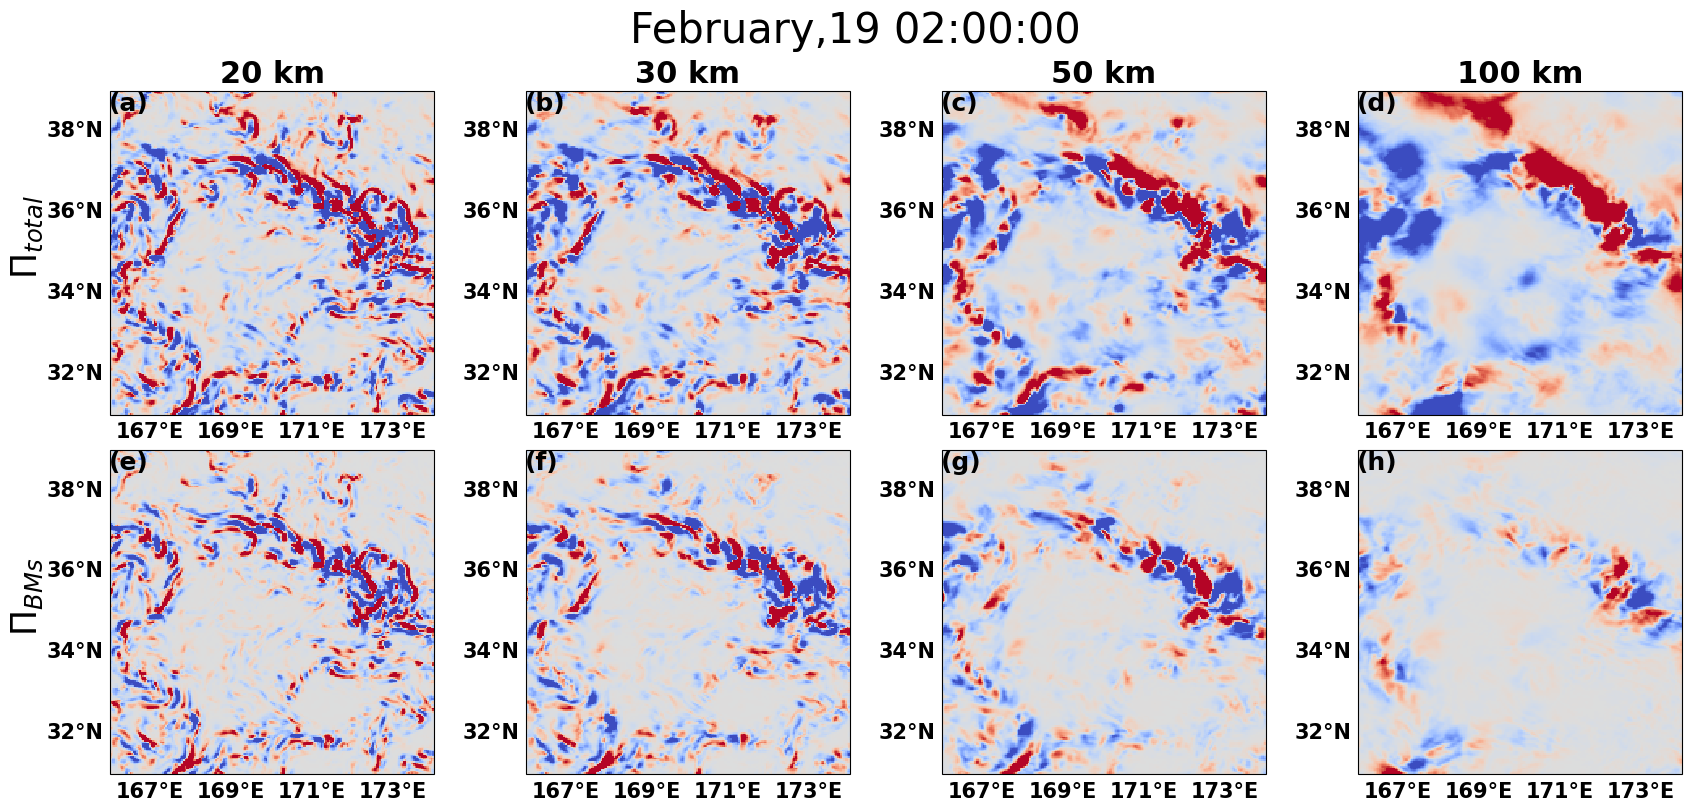

In [4]:
y1, x1 = np.meshgrid(ds.latitude[25:-25].values, ds.longitude[25:-25].values)
nn=10
fig, ax = plt.subplots(nrows=2,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(17,8),constrained_layout=True)

Pi = pi_tot_coas[0,:,:]
az00=ax[0,0].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_tot_coas[1,:,:]
az01=ax[0,1].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_tot_coas[2,:,:]
az02=ax[0,2].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_tot_coas[3,:,:]
az03=ax[0,3].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)

Pi = pi_BMs_coas[0,:,:]
az00=ax[1,0].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_BMs_coas[1,:,:]
az01=ax[1,1].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_BMs_coas[2,:,:]
az02=ax[1,2].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
Pi = pi_BMs_coas[3,:,:]
az03=ax[1,3].pcolormesh(x1,y1,Pi.T,
                        cmap="coolwarm", vmin=-2e-7, vmax=2e-7,transform = ccrs.PlateCarree(),rasterized=True,)
for i2 in range(2):
    for j2 in range(4):      
        gl = ax[i2,j2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='black', alpha=0.0,)
        gl.xlocator = mticker.FixedLocator([167,169,171,173])
        gl.ylocator = mticker.FixedLocator([32, 34, 36, 38])
        gl.xlabels_top = False
        gl.ylabels_right=False
        gl.xlabel_style = {'color': 'black', 'weight': 'bold', "size":15}
        gl.ylabel_style = {'color': 'black', 'weight': 'bold', "size":15}
        #gl.xlabels_bottom = False  # Para quitar etiquetas de x en la parte inferior
        #gl.ylabels_left = False    # Para quitar etiquetas de y en la parte izquierda

ax[0,0].text(-0.20, 0.55, '$\Pi_{total}$', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax[0,0].transAxes, fontsize=25, fontweight="bold")
ax[1,0].text(-0.20, 0.55, '$\Pi_{BMs}$', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax[1,0].transAxes, fontsize=25, fontweight="bold")
ax[0,0].set_title("20 km", fontweight="bold", size=22)
ax[0,1].set_title("30 km", fontweight="bold", size=22)
ax[0,2].set_title("50 km", fontweight="bold", size=22)
ax[0,3].set_title("100 km", fontweight="bold", size=22)

fig.suptitle(time[ntime].strftime("%B,%d %H:00:00"), fontsize=30)


alphabet, num = string.ascii_lowercase, 0
for i in range(4):
    ax[0,i].text(166,38.5, "("+str(alphabet[i])+")", fontweight="bold", color="black", fontsize=18)
    ax[1,i].text(166,38.5, "("+str(alphabet[i+4])+")", fontweight="bold", color="black", fontsize=18)
    
plt.savefig("./figure_12.pdf", dpi=500)     